In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [42]:
df=pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [43]:
df.shape

(4746, 12)

In [44]:
Size = df["Size"]

In [45]:
area_m2 = round(Size / 10.7639104).astype(int)
df["area_m2"] = area_m2
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,area_m2
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,102
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,74
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,93
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,74
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,79


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
 12  area_m2            4746 non-null   int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 463.6+ KB


In [47]:
df.drop(columns = "Size", inplace=True)

In [48]:
df.head()

,Posted On,BHK,Rent,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,area_m2
0,2022-05-18,2,10000,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,102
1,2022-05-13,2,20000,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,74
2,2022-05-16,2,17000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,93
3,2022-07-04,2,10000,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,74
4,2022-05-09,2,7500,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,79


In [49]:
df["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [50]:
df["Point of Contact"].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [51]:
df.drop(columns = ["Tenant Preferred","BHK","Posted On", "Bathroom"], inplace=True)

In [52]:
df.drop(columns="Point of Contact", inplace=True)

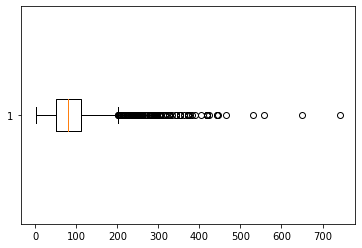

In [53]:
plt.boxplot(df["area_m2"], vert=False);

In [54]:
low, high = df["area_m2"].quantile([0.1,0.9])
mask =df["area_m2"].between(low,high)
df = df[mask]

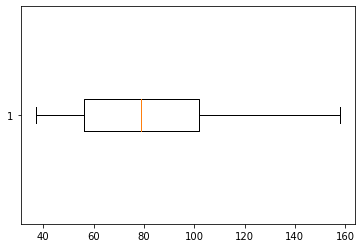

In [55]:
plt.boxplot(df["area_m2"], vert=False);

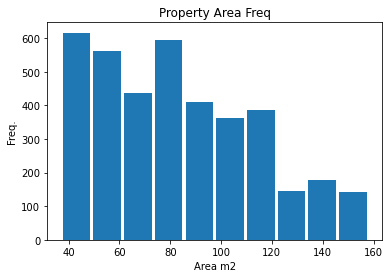

In [56]:
plt.hist(df["area_m2"], bins=10, rwidth=0.9)
plt.title("Property Area Freq"),
plt.xlabel("Area m2"),
plt.ylabel("Freq.");

In [57]:
df.mean()

Rent       27335.132115
area_m2       82.767363
dtype: float64

In [58]:
df.median()

Rent       15000.0
area_m2       79.0
dtype: float64

In [59]:
df.mode()

,Rent,Floor,Area Type,Area Locality,City,Furnishing Status,area_m2
0,15000,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,93


In [60]:
df.describe()

,Rent,area_m2
count,3830.000000,3830.000000
mean,27335.132115,82.767363
std,35820.151230,30.950916
min,1800.000000,37.000000
25%,10000.000000,56.000000
50%,15000.000000,79.000000
75%,28375.000000,102.000000
max,600000.000000,158.000000


In [61]:
df

,Rent,Floor,Area Type,Area Locality,City,Furnishing Status,area_m2
0,10000,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,102
1,20000,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,74
2,17000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,93
3,10000,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,74
4,7500,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,79
...,...,...,...,...,...,...,...
4739,25000,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,97
4740,12000,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,125
4741,15000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,93
4744,45000,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,139


In [62]:
df.isnull().sum()

Rent                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
area_m2              0
dtype: int64

<AxesSubplot:>

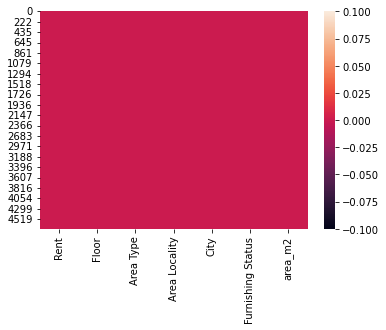

In [63]:
sns.heatmap(df.isnull())

In [64]:
df.corr()

,Rent,area_m2
Rent,1.000000,0.297239
area_m2,0.297239,1.000000


Text(0, 0.5, 'Frequency')

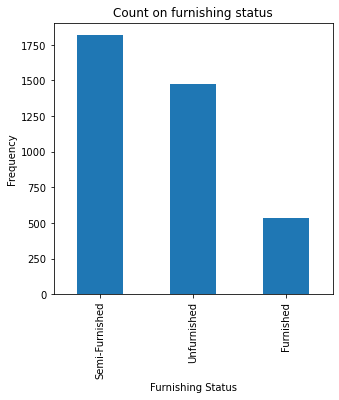

In [70]:
ax =df['Furnishing Status'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Count on furnishing status")
ax.set_xlabel("Furnishing Status")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

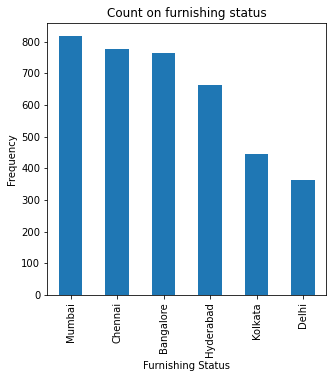

In [71]:
ax = df['City'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Count on furnishing status")
ax.set_xlabel("Furnishing Status")
ax.set_ylabel("Frequency")

<AxesSubplot:>

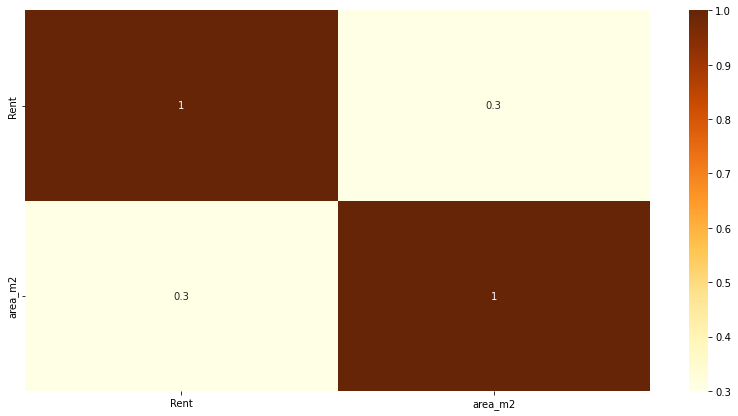

In [72]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

ValueError: Could not interpret input 'Tenant Preferred'

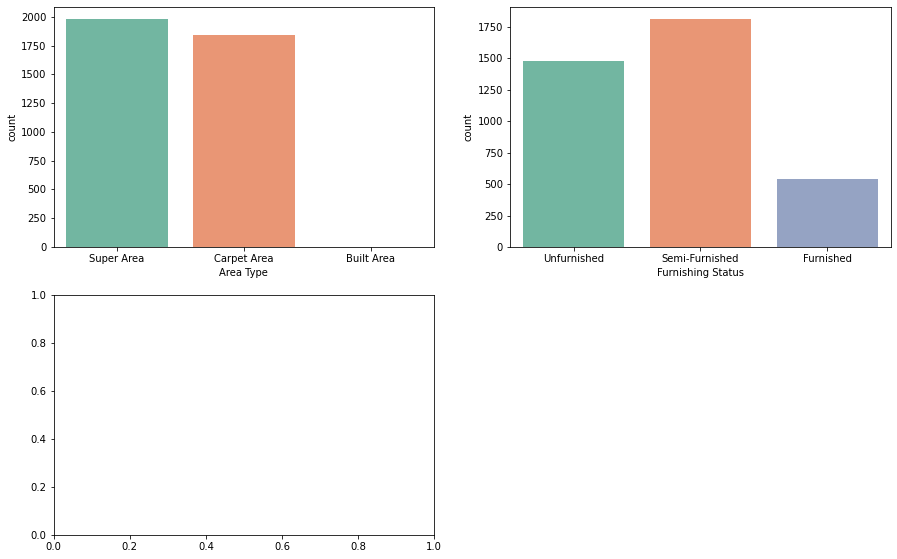

In [73]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'Area Type', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Furnishing Status', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Tenant Preferred', palette='Set2', data = df)



<AxesSubplot:xlabel='City', ylabel='Rent'>

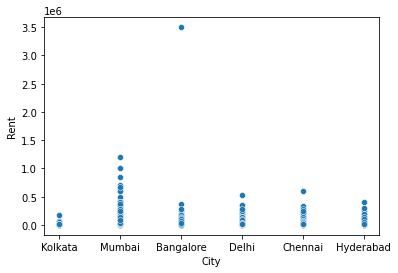

In [11]:
sns.scatterplot(x = "City", y = "Rent",data = df,)


<AxesSubplot:xlabel='Furnishing Status', ylabel='Rent'>

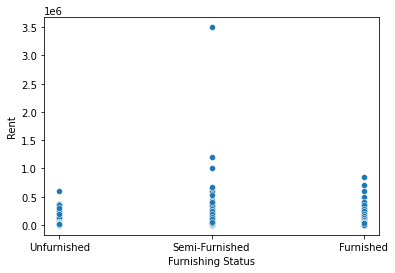

In [12]:
sns.scatterplot(x = "Furnishing Status", y = "Rent", data = df)

In [28]:
df['City'].value_counts()

Mumbai       818
Chennai      778
Bangalore    763
Hyderabad    664
Kolkata      445
Delhi        362
Name: City, dtype: int64

In [29]:
df['Rent'].value_counts()

15000    245
12000    222
10000    215
20000    149
8000     135
        ... 
84000      1
51500      1
59000      1
77500      1
5800       1
Name: Rent, Length: 207, dtype: int64

### Multivariate analysis 

### Area Type vs City vs Bathroom


In [9]:
res=pd.pivot_table(data=df,index="Area Type",columns="City",values="Bathroom")
res

City,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Area Type,,,,,,
Built Area,NaN,2.000000,NaN,1.000000,NaN,NaN
Carpet Area,1.949405,2.193651,2.019048,2.369919,1.424242,2.388078
Super Area,1.698182,1.892174,1.672414,2.064412,1.438462,1.733333


<AxesSubplot:xlabel='City', ylabel='Area Type'>

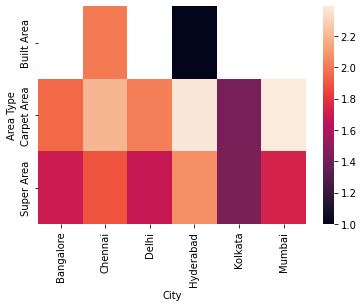

In [12]:
sns.heatmap(res)

<AxesSubplot:xlabel='City', ylabel='Area Type'>

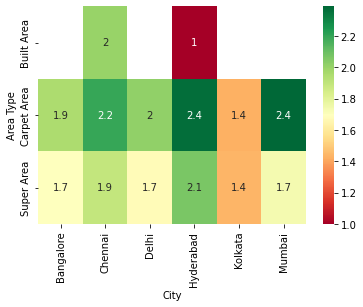

In [11]:
sns.heatmap(res,annot=True,cmap="RdYlGn")

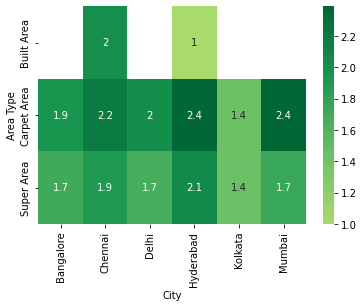

In [10]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

### City vs Tenant Preferred vs Bathroom

In [13]:
res=pd.pivot_table(data=df,index="City",columns="Tenant Preferred",values="Bathroom")
res

Tenant Preferred,Bachelors,Bachelors/Family,Family
City,,,
Bangalore,2.000000,1.724784,2.140351
Chennai,2.240876,1.919877,2.171429
Delhi,2.086420,1.761574,2.000000
Hyderabad,2.137255,2.081361,2.677778
Kolkata,1.409836,1.424802,1.652174
Mumbai,2.191860,2.271987,2.424731


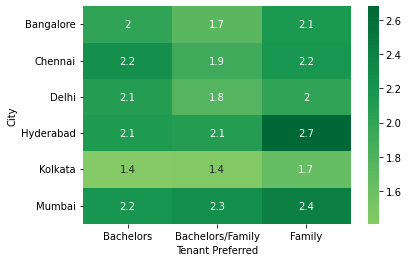

In [15]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

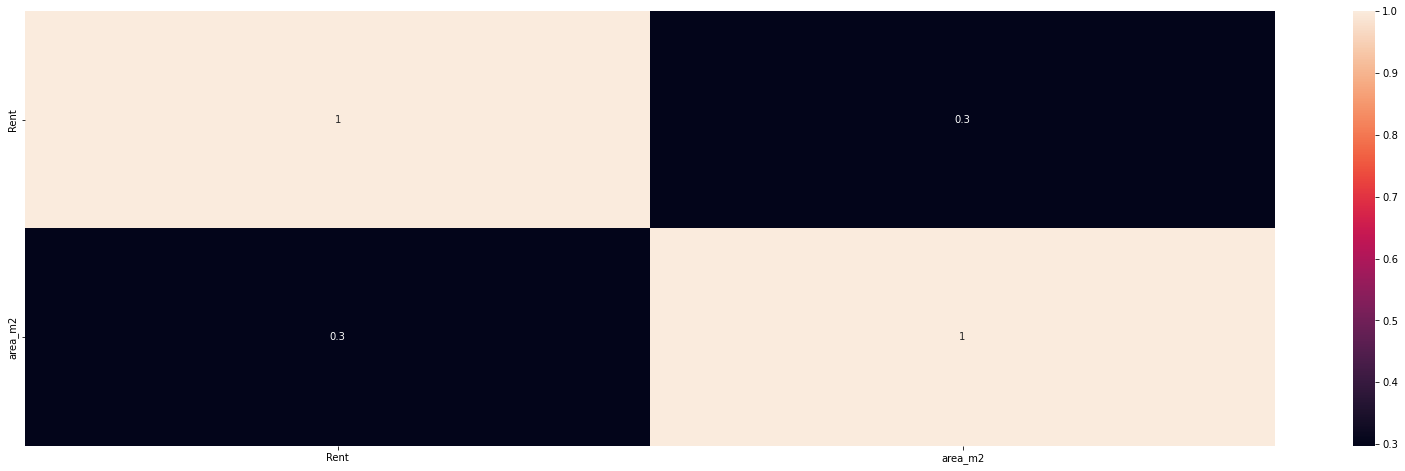

In [36]:
plt.subplots(figsize=(28,8))
corr = df.corr()
sns.heatmap(corr,annot=True,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values);
plt.show()

C:\Users\91991\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


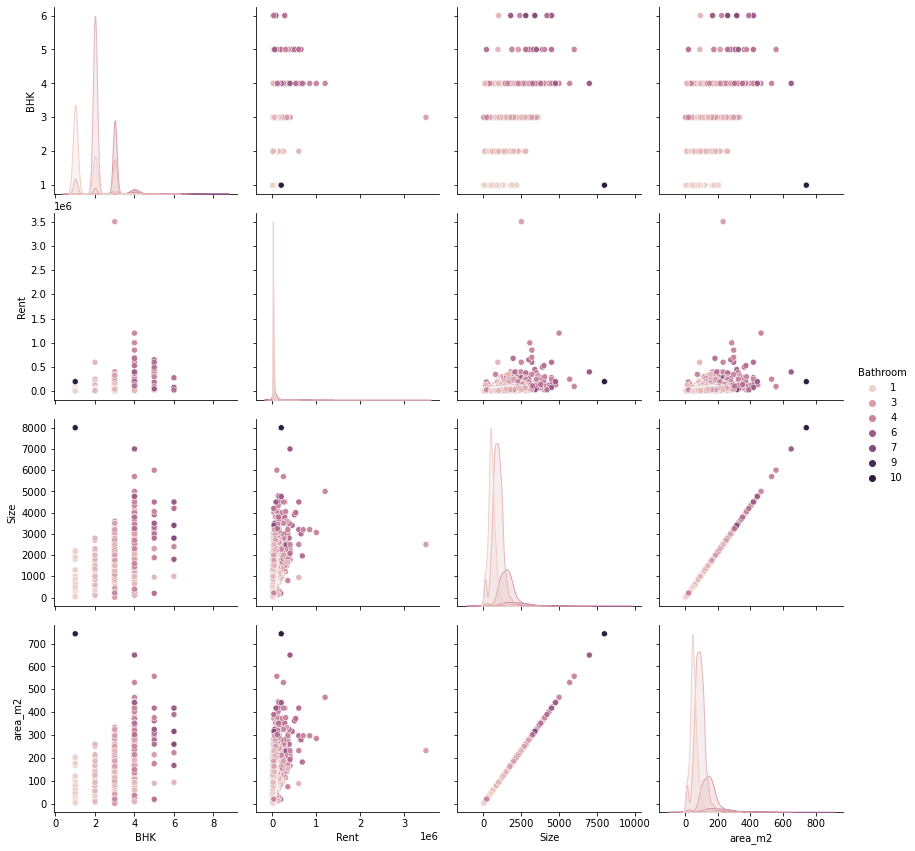

In [14]:
sns.pairplot(df,hue="Bathroom",size=3)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3830 entries, 0 to 4745
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rent               3830 non-null   int64 
 1   Floor              3830 non-null   object
 2   Area Type          3830 non-null   object
 3   Area Locality      3830 non-null   object
 4   City               3830 non-null   object
 5   Furnishing Status  3830 non-null   object
 6   area_m2            3830 non-null   int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 224.4+ KB
